In [1]:
import numpy as np
from scipy.stats import uniform, norm, bernoulli, t
from matplotlib import pyplot as plt


## Демонстрация центральной предельной теоремы. 


In [2]:

def test_clt(distr, sample_sizes, n_samples=10000, n_bins=25):
    for sample_size in sample_sizes:
        print("Тестирую размер выборки {}.".format(sample_size))
        sample_means = distr.rvs((n_samples, sample_size)).mean(axis=1)
        normal_approximation = norm(sample_means.mean(), sample_means.std())
        plt.rc("figure", figsize=(16, 6))

        plt.subplot(121)
        x = np.linspace(sample_means.min(), sample_means.max(), 1001)
        plt.plot(x, normal_approximation.pdf(x),
                 label="Плотность нормального приближения")
        plt.hist(sample_means, density=True, bins=n_bins,
                 label="Гистограмма получившихся значений")
        plt.title("Функция плотности")
        plt.legend()

        plt.subplot(122)
        sample_means.sort()
        empirical_cdf_vals = np.arange(0, n_samples + 1) / n_samples
        normal_cdf = normal_approximation.cdf(sample_means)
        deviation = max(
            np.abs(normal_cdf - empirical_cdf_vals[:-1]).max(),
            np.abs(normal_cdf - empirical_cdf_vals[1:]).max()
        )
        print("Отклонение эмпирической функции распределения от нормальной {}".format(deviation))
        plt.plot(sample_means, empirical_cdf_vals[1:],
                 label="Эмирическая ф-ция распределения")
        plt.plot(sample_means, normal_approximation.cdf(sample_means),
                 label="Ф-ция распределения нормального приближения")
        plt.title("Функция распределения")
        plt.legend()


        plt.show()




Проверим ЦПТ для какого-нибудь "адекватного" распределения

Тестирую размер выборки 1.
Отклонение эмпирической функции распределения от нормальной 0.05595697842899228


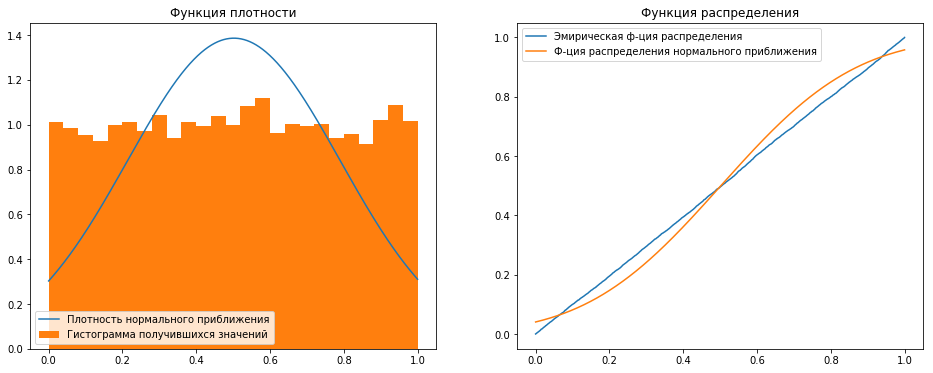

Тестирую размер выборки 2.
Отклонение эмпирической функции распределения от нормальной 0.017769855462520412


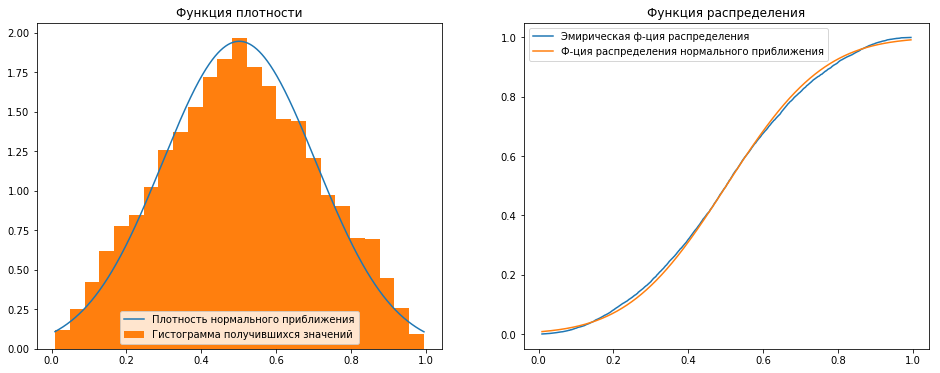

Тестирую размер выборки 3.
Отклонение эмпирической функции распределения от нормальной 0.01008063668107817


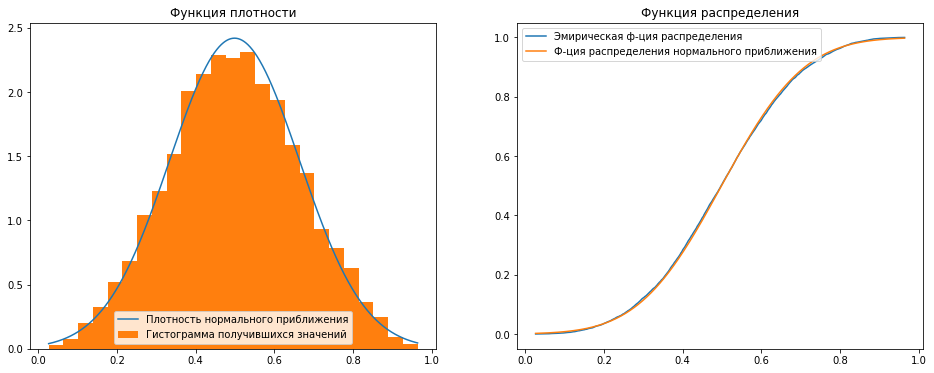

Тестирую размер выборки 5.
Отклонение эмпирической функции распределения от нормальной 0.009544330941999468


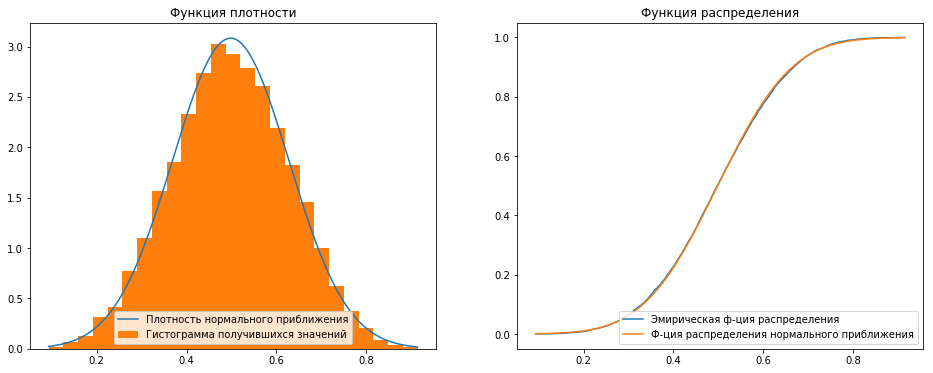

Тестирую размер выборки 10.
Отклонение эмпирической функции распределения от нормальной 0.006048369176307022


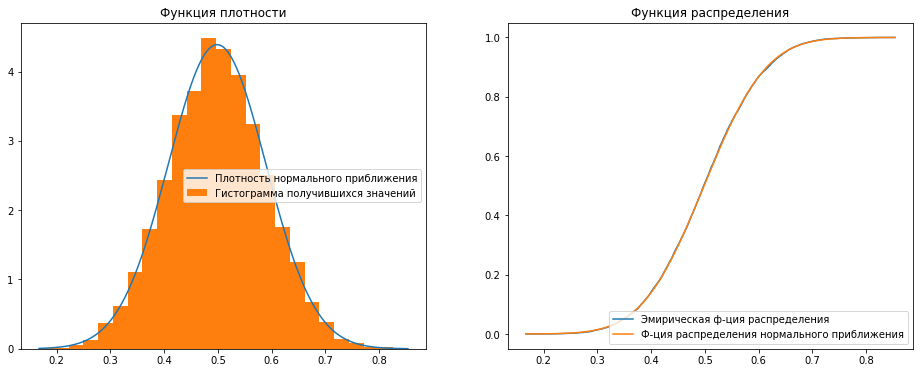

Тестирую размер выборки 20.
Отклонение эмпирической функции распределения от нормальной 0.005274002505846309


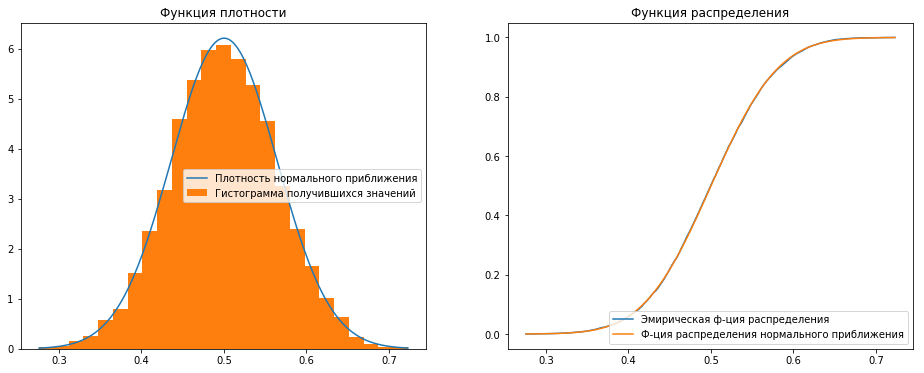

Тестирую размер выборки 100.
Отклонение эмпирической функции распределения от нормальной 0.006830531909751469


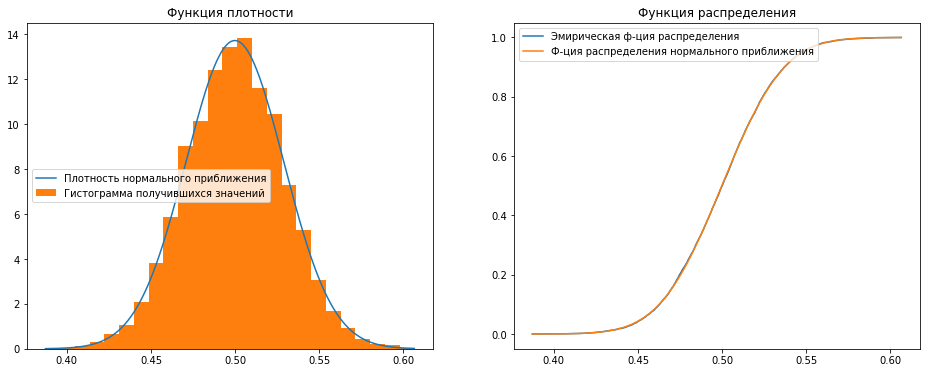

In [3]:
test_clt(uniform(), [1, 2, 3, 5, 10, 20, 100])

### Пример, когда ЦПТ "не работает"

Посмотрим, работает ли ЦПТ для распределения Коши (оно же распределение Стьюдента с 1 степенью свободы).  
Распределение Коши не подпадает под условия ЦПТ т. к. у него бесконечная дисперсия.  
Посмотрим на это плохое распределение:

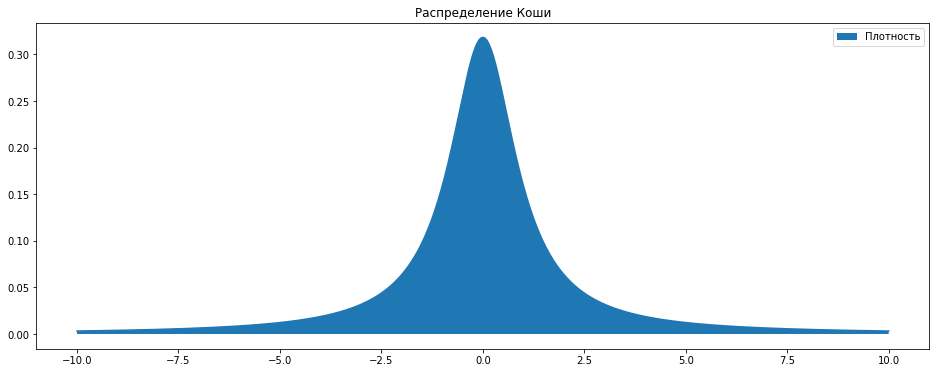

In [4]:
bad_distribution = t(1)
x = np.linspace(-10, 10, 1000)

plt.title("Распределение Коши")
plt.fill_between(x, 0, bad_distribution.pdf(x), label="Плотность")
plt.plot(x, bad_distribution.pdf(x))
plt.legend()
plt.show()

Посмотрим насколько "нормально" распределены средние значения выборок из распределения Коши: 

Тестирую размер выборки 2.
Отклонение эмпирической функции распределения от нормальной 0.46785384549984455


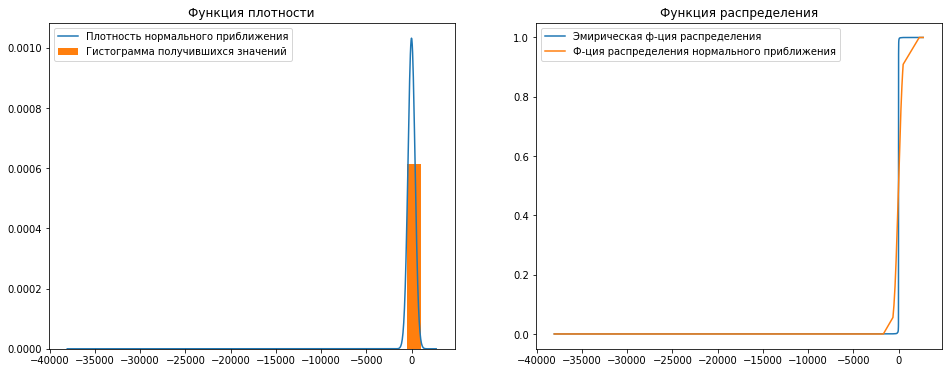

Тестирую размер выборки 5.
Отклонение эмпирической функции распределения от нормальной 0.4076660297359497


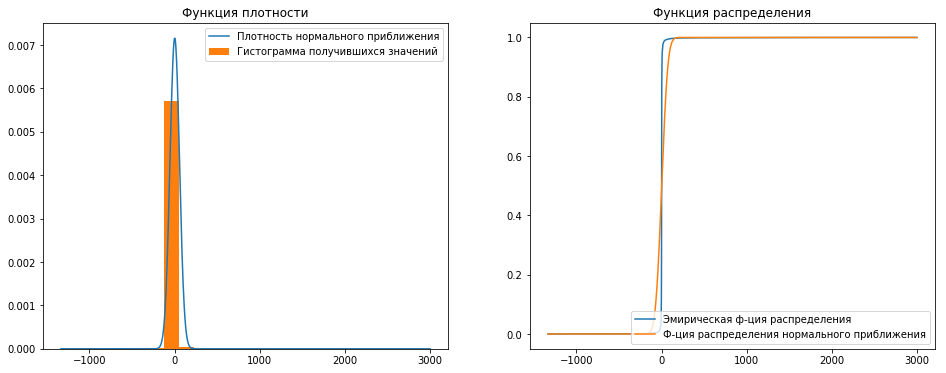

Тестирую размер выборки 20.
Отклонение эмпирической функции распределения от нормальной 0.4356320984934585


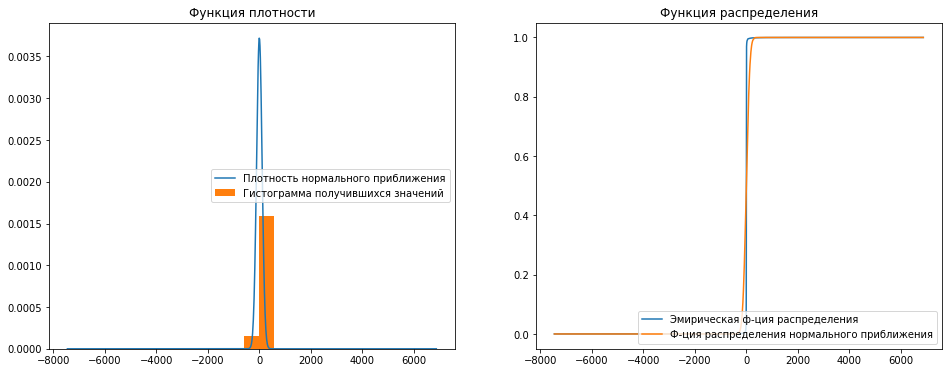

Тестирую размер выборки 100.
Отклонение эмпирической функции распределения от нормальной 0.4689777694784725


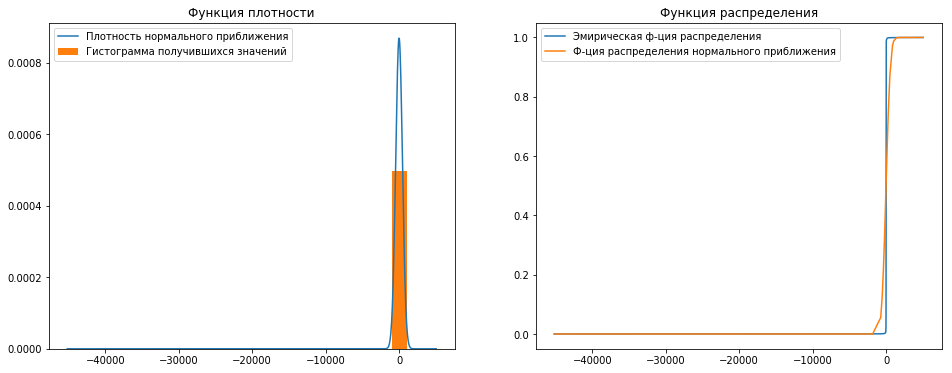

Тестирую размер выборки 1000.
Отклонение эмпирической функции распределения от нормальной 0.4535478631572096


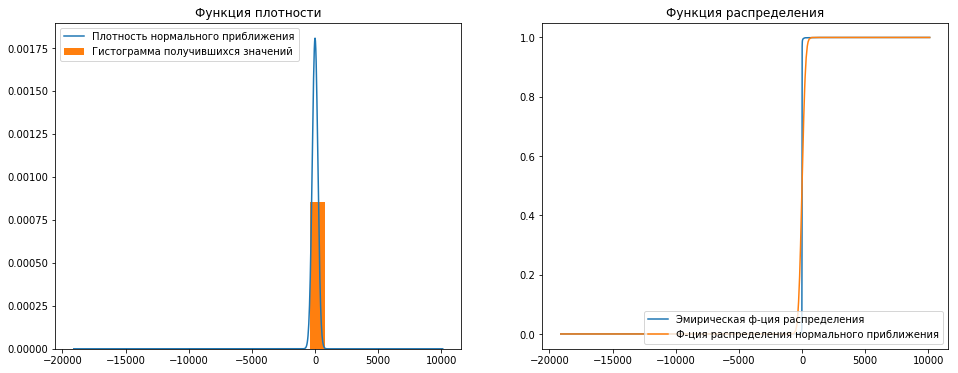

In [5]:
test_clt(bad_distribution, [2, 5, 20, 100, 1000])